In [1]:
import wrangle as w
import explore as e
import env

import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

from importlib import reload

In [2]:
reload(w)
df = w.wrangle_zillow()

In [3]:
train, validate, test = w.tvt_split(df)

In [4]:
train.calc_sqft.isnull().sum()

0

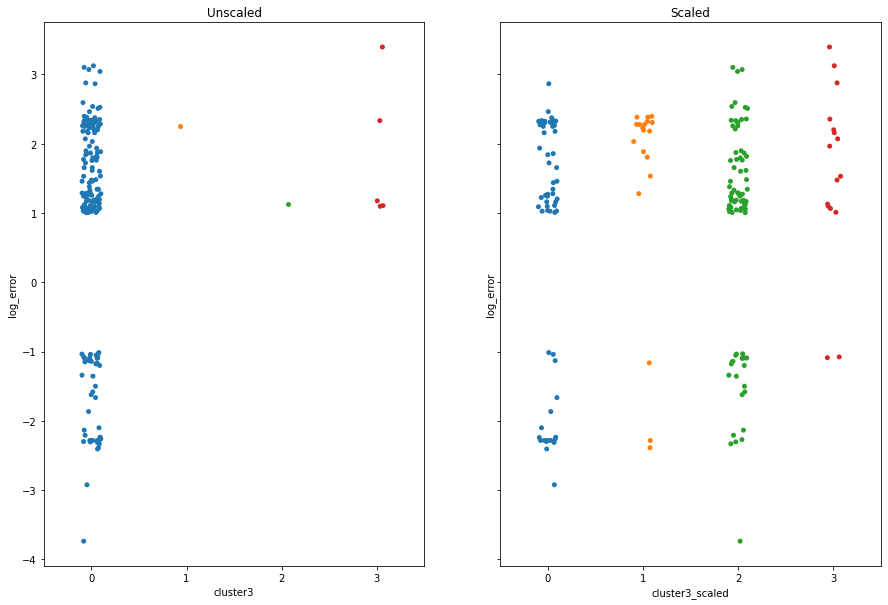

In [5]:
bound = 1
bound_train = train[(train.log_error < (0-bound)) | (train.log_error > bound)]
e.viz_for_Q3(bound_train)

In [14]:
def viz_for_Q3(train_df):
    
    #unscaled data
    X3 = train[['garage_car_count', 'pool_count', 'lot_sqft']]
    kmeans = KMeans(n_clusters = 4, random_state = 89).fit(X3)
    train['cluster3'] = kmeans.predict(X3)
    
    #scaled data
    train_scaled3 = w.scale(train, ['garage_car_count', 'pool_count', 'lot_sqft'])
    X3_scaled = train_scaled3[['scaled_garage_car_count', 'scaled_pool_count', 'scaled_lot_sqft']]
    kmeans = KMeans(n_clusters = 4, random_state = 89).fit(X3_scaled)
    train_scaled3['cluster3_scaled'] = kmeans.predict(X3_scaled)
    train_scaled3['log_error'] = train['log_error']
    
    #viz 
    fig, axes= plt.subplots(1,2, figsize =(15, 10), sharey = True)
    fig.subtitle = ('Unscaled vs. Scaled')

    #Unscaled
    sns.stripplot(ax=axes[0], data = train, x = 'cluster3', y = 'log_error')
    axes[0].set_title('Unscaled')

    #Scaled
    sns.stripplot(ax = axes[1],data = train_scaled3, x = 'cluster3_scaled', y = 'log_error')
    axes[1].set_title('Scaled')
    
    plt.show()

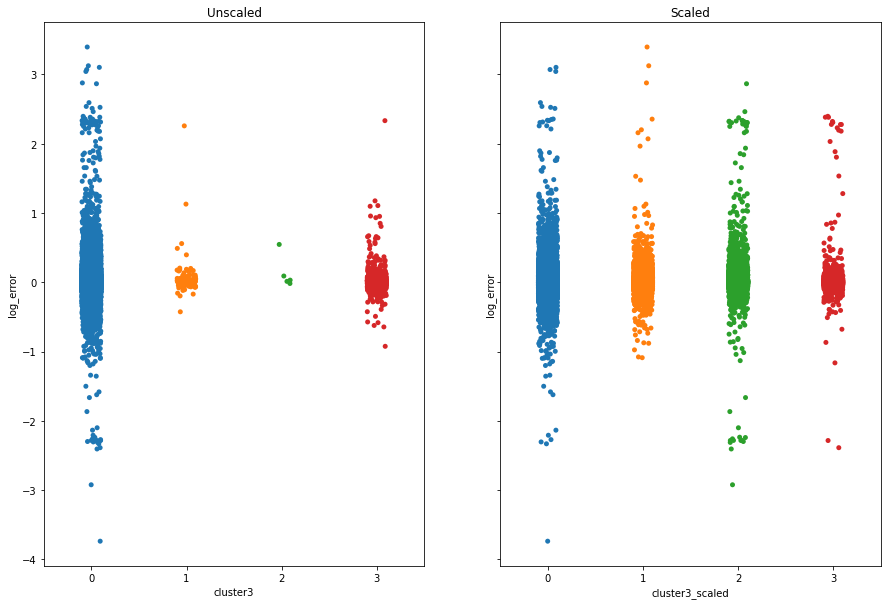

In [15]:
viz_for_Q3(train)

In [12]:
def viz_for_Q2(train_df):
    
    #unscaled data
    X2 = train_df[['tax_value', 'calc_sqft']]
    kmeans = KMeans(n_clusters = 4,random_state = 89).fit(X2)
    train['cluster2'] = kmeans.predict(X2)
    
    #scaled data
    train_scaled2 = w.scale(train, ['tax_value', 'calc_sqft'])
    X2_scaled = train_scaled2[['scaled_tax_value', 'scaled_calc_sqft']]
    kmeans = KMeans(n_clusters = 4, random_state = 89).fit(X2_scaled)
    
    train_scaled2['cluster2_scaled'] = kmeans.predict(X2_scaled)
    train_scaled2['log_error'] = train['log_error']
    
    #viz 
    fig, axes= plt.subplots(1,2, figsize =(15, 10), sharey = True)
    fig.subtitle = ('Unscaled vs. Scaled')

    #Unscaled
    sns.stripplot(ax=axes[0], data = train, x = 'cluster2', y = 'log_error')
    axes[0].set_title('Unscaled')

    #Scaled
    sns.stripplot(ax = axes[1],data = train_scaled2, x = 'cluster2_scaled', y = 'log_error')
    axes[1].set_title('Scaled')
    
    plt.show()

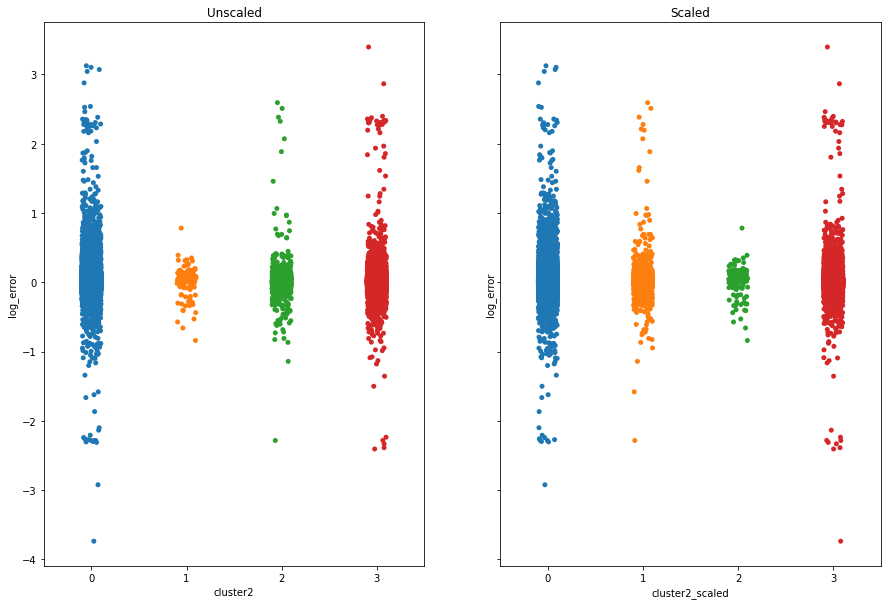

In [13]:
viz_for_Q2(train)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43325 entries, 8691 to 31788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   parcel_id               43325 non-null  Int64         
 1   bath_count              43325 non-null  Float64       
 2   bed_count               43325 non-null  Int64         
 3   calc_bath_and_bed       42983 non-null  Float64       
 4   calc_sqft               43325 non-null  Int64         
 5   finished_sqft12         41287 non-null  Int64         
 6   fips                    43325 non-null  category      
 7   fireplace_count         43325 non-null  Int64         
 8   full_bath_count         42983 non-null  Int64         
 9   garage_car_count        43325 non-null  Int64         
 10  latitude                43325 non-null  Int64         
 11  longitude               43325 non-null  Int64         
 12  lot_sqft                43325 non-null  Int

In [11]:
train.tax_value.isnull().sum()

0

<AxesSubplot:xlabel='log_error', ylabel='Count'>

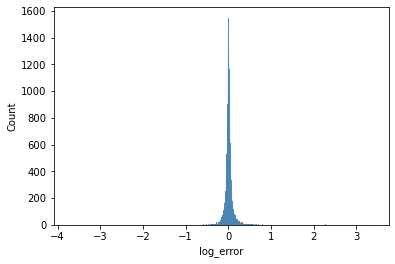

In [18]:
sns.histplot(data = train, x= "log_error")